In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import healpy as hp
from functions import loc2data, get_rand_locs

In [2]:
m_857 = hp.read_map("skymaps/HFI_SkyMap_857_2048_R1.10_nominal.fits")
print(len(m_857))
m_857 = hp.ud_grade(m_857, 1024)
print(len(m_857))

50331648
12582912


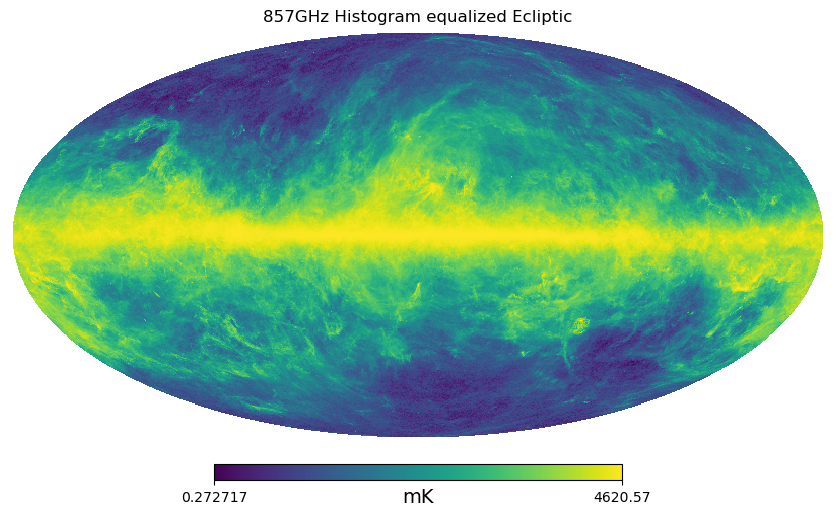

In [3]:
hp.mollview(
    m_857,
    #coord=["G", "E"],
    title="857GHz Histogram equalized Ecliptic",
    unit="mK",
    norm="hist",
)

In [4]:
def loc2data(map_array: np.ndarray, loc: list[float], circ_rad: float, cutout_rad: float,
             side_len: int = 0, range_max: int = 0, show_mollview: bool = False, show_gnomview: bool = False,
             units: str = "mK") -> tuple[np.ndarray, float, float]:
    '''
    Plots and/or returns data around a location on a map.
    
    Args:
        map_array: 1d numpy array of pixels in healpy Ring format.
        loc: a longitude and latitude location on the map in radians.
        circ_rad: radius of the disk around the location to be considered.
        cutout_rad: radius of the pixels within the circle to be set to 0.
        side_len (optional): length of one side of the returned 2d array/image.
            If not given, will attempt to include entire circle.
        range_max (optional): max pixel value for healpy mollview/gnomview projection.
            If not given, will use 95th percentile pixel value of main disk.
        show_mollview (optional): if True, show mollweide projection. Default False.
        show_mollview (optional): if True, show gnomonic projection. Default False.
        units (optional): units for map projection. Default is "mK".

    Returns:
        data_2d: 2d numpy array of pixels returned by healpy.gnomview.
        annulus_average: average value of pixels in circle (excluding cutout)
        actual_average: average value of pixels in cutout

    '''
    nside = hp.get_nside(map_array)

    loc_deg = np.rad2deg(loc)
    loc_3d = hp.ang2vec(*loc_deg, lonlat=True)

    ipix_disc = hp.query_disc(nside=nside, vec=loc_3d, radius=circ_rad)
    subdisc = hp.query_disc(nside=nside, vec=loc_3d, radius=cutout_rad)

    submap = np.zeros(len(map_array))
    submap[ipix_disc] = map_array[ipix_disc]
    submap[subdisc] = 0

    if range_max == 0:
        range_max = np.percentile(map_array[ipix_disc], 95)
    if show_mollview:
        hp.mollview(
            submap,
            title="Submap Mollweide Projection",
            unit=units,
            max=range_max
        )

    if side_len == 0:
        side_len = int(circ_rad * 4750) # magic number found with brute force.
    data_2d = hp.gnomview(
        submap,
        rot=loc_deg,
        xsize=side_len,
        title="Submap Gnomonic Projection",
        unit=units,
        max=range_max,
        return_projected_map=True,
        no_plot=(not show_gnomview)
    )

    submap[subdisc] = np.nan
    annulus_average: float = np.nanmean(submap[ipix_disc])
    actual_average: float = np.nanmean(map_array[subdisc])
    return (data_2d, annulus_average, actual_average)


30.922569835603788
72.05966


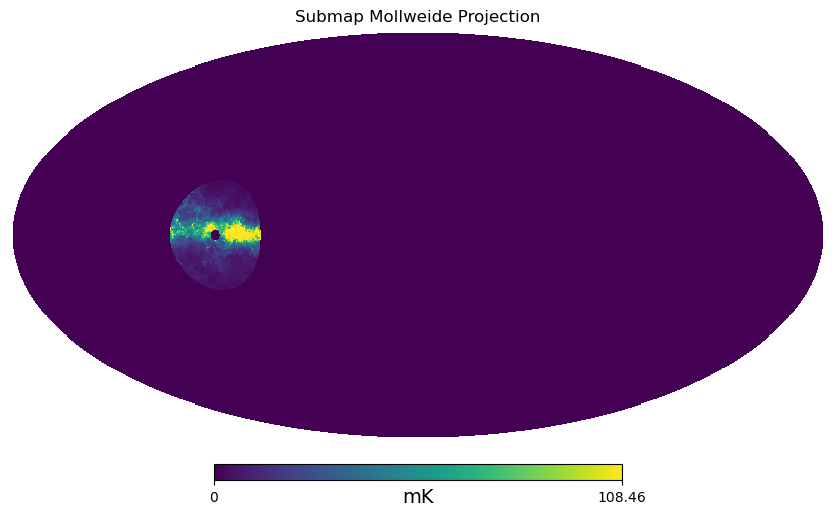

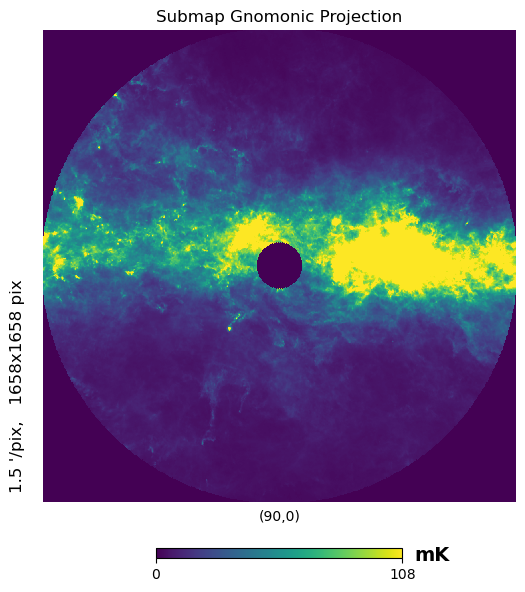

In [5]:
map_array = m_857
loc = [np.pi / 2, 0]
circ_radius = np.pi / 9
cutout_radius = circ_radius / 10
data, annulus, actual = loc2data(map_array, loc, circ_radius, cutout_radius, show_mollview=True, show_gnomview=True)
print(annulus)
print(actual)

72.05966301829524
nan


/var/folders/0l/rp59m9ys5pvg9bf1nt_gxyhr0000gn/T/ipykernel_20533/2912503268.py:63: RuntimeWarning: Mean of empty slice
  actual_average: float = np.nanmean(map_array[subdisc])


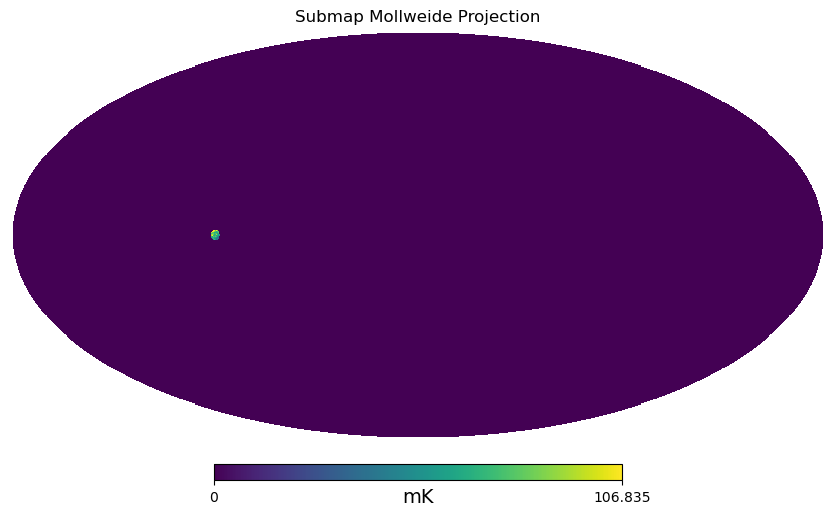

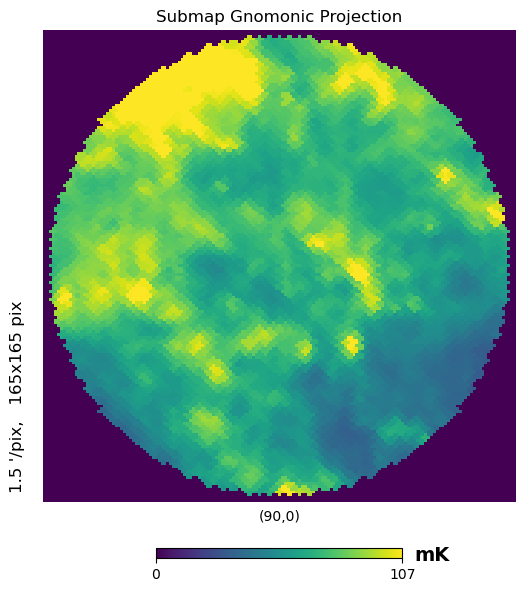

In [6]:
circ_radius = np.pi / 90
cutout_radius = 0
data, annulus, actual = loc2data(map_array, loc, circ_radius, cutout_radius, show_mollview=True, show_gnomview=True)
print(annulus)
print(actual)

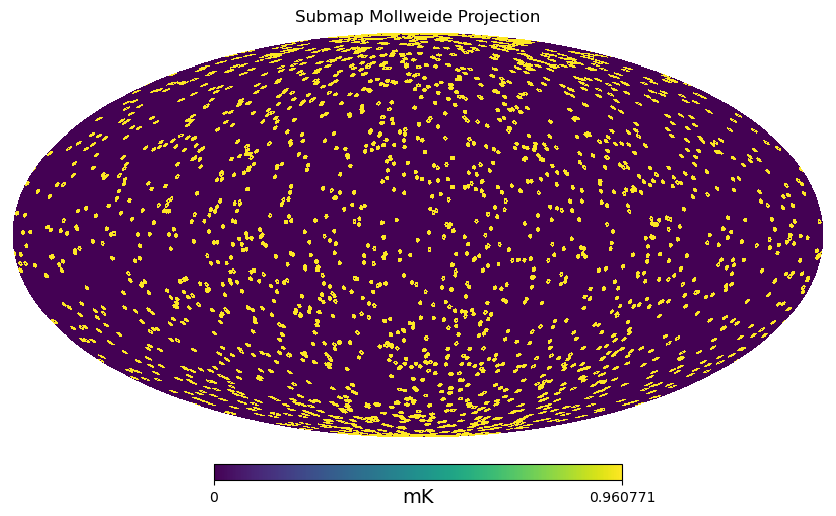

In [7]:
rand_locs = get_rand_locs(2000, sphere_distr=False)
map_array = np.copy(m_857)
altered_array = np.zeros(len(map_array))
loc = [np.pi / 2, 0]
circ_rad = np.pi / 200
cutout_rad = circ_rad / 10

nside = hp.get_nside(map_array)
for loc in rand_locs:
    loc_deg = np.rad2deg(loc)
    loc_3d = hp.ang2vec(*loc_deg, lonlat=True)

    ipix_disc = hp.query_disc(nside=nside, vec=loc_3d, radius=circ_rad)
    subdisc = hp.query_disc(nside=nside, vec=loc_3d, radius=cutout_rad)

    altered_array[ipix_disc] = 100
    altered_array[subdisc] = 0

    range_max = np.percentile(map_array[ipix_disc], 95)

hp.mollview(
    altered_array,
    title="Submap Mollweide Projection",
    unit="mK",
    max=range_max
)

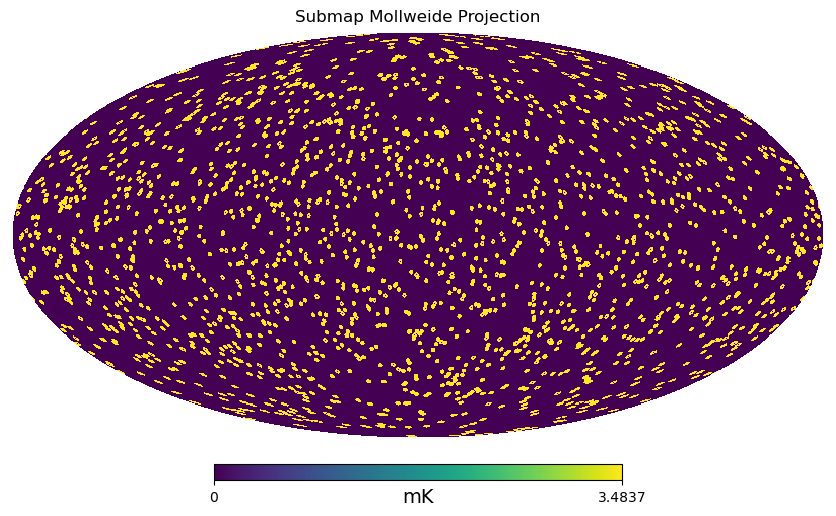

In [8]:
rand_locs = get_rand_locs(2000, sphere_distr=True)
map_array = np.copy(m_857)
altered_array = np.zeros(len(map_array))
loc = [np.pi / 2, 0]
circ_rad = np.pi / 200
cutout_rad = circ_rad / 10

nside = hp.get_nside(map_array)
for loc in rand_locs:
    loc_deg = np.rad2deg(loc)
    loc_3d = hp.ang2vec(*loc_deg, lonlat=True)

    ipix_disc = hp.query_disc(nside=nside, vec=loc_3d, radius=circ_rad)
    subdisc = hp.query_disc(nside=nside, vec=loc_3d, radius=cutout_rad)

    altered_array[ipix_disc] = 100
    altered_array[subdisc] = 0

    range_max = np.percentile(map_array[ipix_disc], 95)

hp.mollview(
    altered_array,
    title="Submap Mollweide Projection",
    unit="mK",
    max=range_max
)